#Load dataset and preprocesing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
df = pd.read_csv("/Users/ferhatkoc/Desktop/machine_learning/regression/AmesHousing.csv")
#df.head(10)
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna("None")

In [3]:
structural_zero_num = [
    # Basement
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "BsmtFullBath", "BsmtHalfBath",
    # Garage
    "GarageCars", "GarageArea",
    # Masonry
    "MasVnrArea",
]

structural_zero_num = [c for c in structural_zero_num if c in df.columns]

df[structural_zero_num] = df[structural_zero_num].fillna(0)

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns

remaining_na_num = df[num_cols].columns[df[num_cols].isna().any()]

for col in remaining_na_num:
    df[col] = df[col].fillna(df[col].median())


In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


In [6]:
y = df["SalePrice"]          
X = df.drop("SalePrice", axis=1)

In [7]:
X = pd.get_dummies(X, drop_first=True)


In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [11]:
scaler = StandardScaler()

# get_dummies sonrası sayısal kolonları seç
numeric_cols = X_train.columns[X_train.std() > 1]

# KOPYA al (orijinal X_train bozulmasın)
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# SADECE sayısalları scale et
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols]  = scaler.transform(X_test[numeric_cols])

print(X_train_scaled.shape, X_test_scaled.shape)

(2344, 278) (586, 278)


#linear , ridge , lasso regression models , traim hyperparameter tuning

In [ ]:
#Basic Lineer Regression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled , y_train)

lin_reg_predict = lin_reg.predict(X_test_scaled) 

mse_lin = mean_squared_error(y_test , lin_reg_predict)
r2_lin  = r2_score(y_test , lin_reg_predict )
rmse_lin = np.sqrt(mse_lin)

print(f"Linear Regression MSE: {mse_lin}, Linear Regression R2 Score: {r2_lin} , Linear Regression RMSE: {rmse_lin} ")
#Linear Regression MSE: 1241152933.333307, Linear Regression R2 Score: 0.8451954457860308 , Linear Regression RMSE: 35230.00047308128 


Linear Regression MSE: 1241152933.333307, Linear Regression R2 Score: 0.8451954457860308 , Linear Regression RMSE: 35230.00047308128 


In [ ]:
#Ridge Regression 

In [13]:
ridge_params ={"alpha":[0.1,1,10,100]}
ridge = Ridge()

ridge_grid = GridSearchCV(ridge , ridge_params)
ridge_grid.fit(X_train_scaled , y_train)

ridge_pred = ridge_grid.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test , ridge_pred)
r2_ridge  = r2_score(y_test , ridge_pred)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, Ridge Regression R2 Score: {r2_ridge} , Ridge Regression RMSE: {rmse_ridge} ")
print("Best alpha:", ridge_grid.best_params_)

#Ridge Regression MSE: 843590007.2430297, Ridge Regression R2 Score: 0.8947820437728874 , Ridge Regression RMSE: 29044.620969174823 
#Best alpha: {'alpha': 10}



Ridge Regression MSE: 843590007.2430297, Ridge Regression R2 Score: 0.8947820437728874 , Ridge Regression RMSE: 29044.620969174823 
Best alpha: {'alpha': 10}


In [16]:

lasso_params = {"alpha": [0.1, 1, 10, 100]}
lasso = Lasso(max_iter=10000)

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)          

lasso_pred = lasso_grid.predict(X_test_scaled)   

mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso  = r2_score(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)

print(f"Lasso Regression MSE: {mse_lasso}, Lasso Regression R2 Score: {r2_lasso}, Lasso Regression RMSE: {rmse_lasso}")
print("Best alpha:", lasso_grid.best_params_)

#Lasso Regression MSE: 857412480.4619987, Lasso Regression R2 Score: 0.8930580162599763, Lasso Regression RMSE: 29281.606521193447
#Best alpha: {'alpha': 100}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.057e+10, tolerance: 1.132e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e+11, tolerance: 1.082e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.899e+10, toler

Lasso Regression MSE: 857412480.4619987, Lasso Regression R2 Score: 0.8930580162599763, Lasso Regression RMSE: 29281.606521193447
Best alpha: {'alpha': 100}


In [ ]:
#ElasticNet training and hyperparameter tuning 

In [17]:
elastic_params = {
    "alpha": [0.1, 1, 10],
    "l1_ratio": [0.1, 0.5, 0.8]
}
elastic = ElasticNet(max_iter=10000)

elastic_grid = GridSearchCV(elastic, elastic_params, cv=5)
elastic_grid.fit(X_train_scaled, y_train)          

elastic_pred = elastic_grid.predict(X_test_scaled) 

mse_elastic = mean_squared_error(y_test, elastic_pred)
r2_elastic  = r2_score(y_test, elastic_pred)
rmse_elastic = np.sqrt(mse_elastic)

print(f"Elastic Regression MSE:{mse_elastic},Elastic Regression R2 Score: {r2_elastic}, Elastic Regression: {rmse_elastic}  ")
print("Best Alpha", elastic_grid.best_params_ )

#Elastic Regression MSE:879268690.1436876,Elastic Regression R2 Score: 0.8903319696095493, Elastic Regression: 29652.465161326596  
#Best Alpha {'alpha': 0.1, 'l1_ratio': 0.8}


Elastic Regression MSE:879268690.1436876,Elastic Regression R2 Score: 0.8903319696095493, Elastic Regression: 29652.465161326596  
Best Alpha {'alpha': 0.1, 'l1_ratio': 0.8}


In [ ]:
# Model Comparison

Text(0.5, 1.0, 'Model MSE Comparision')

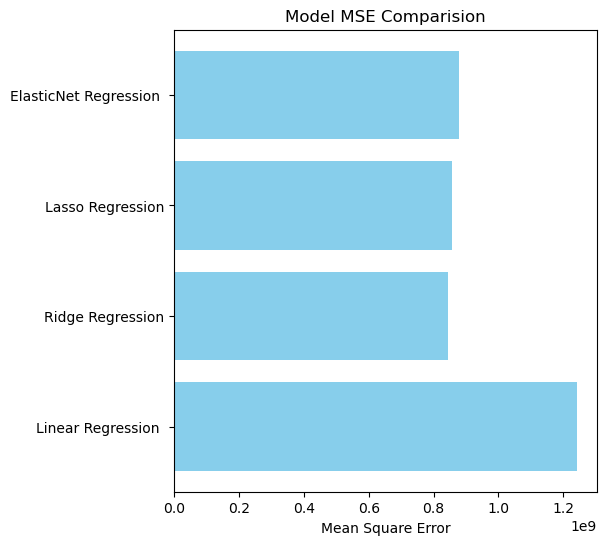

In [20]:
models = ["Linear Regression ","Ridge Regression","Lasso Regression","ElasticNet Regression "]
mses = [mse_lin,mse_ridge,mse_lasso,mse_elastic]
r2s = [r2_lin,r2_ridge,r2_lasso,r2_elastic]
rmses=[rmse_lin,rmse_ridge,rmse_lasso,rmse_elastic]

plt.figure(figsize = (12,6))
#mse plot
plt.subplot(1,2,1)
plt.barh(models , mses , color = "skyblue")
plt.xlabel("Mean Square Error")
plt.title("Model MSE Comparision")

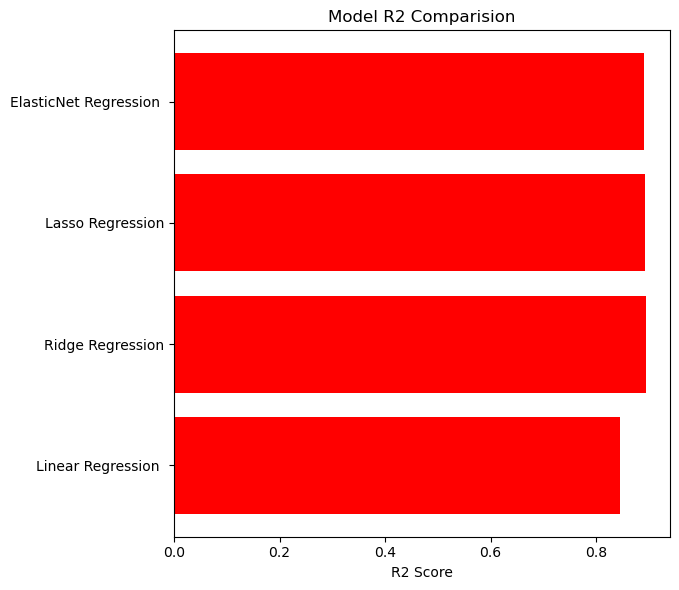

In [19]:
#r2 score
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.barh(models , r2s, color="red")
plt.xlabel("R2 Score")
plt.title("Model R2 Comparision")

plt.tight_layout()
plt.show()


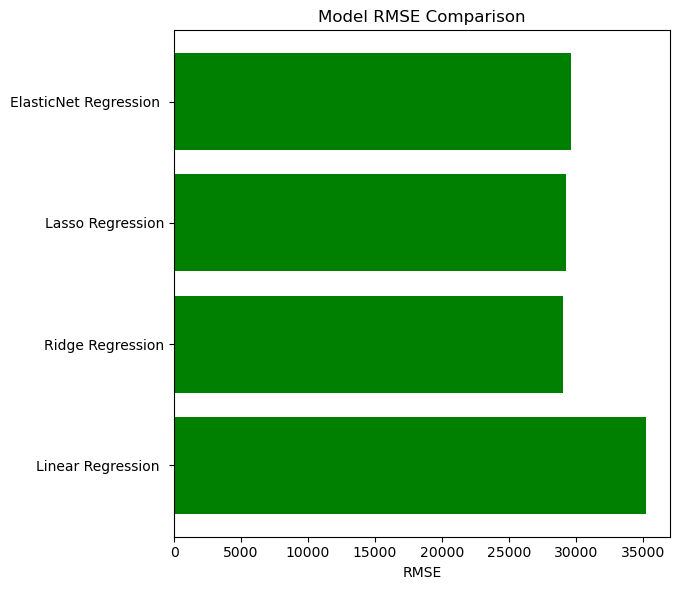

In [23]:
#rmse 
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)

plt.barh(models, rmses, color="green")

plt.xlabel("RMSE")
plt.title("Model RMSE Comparison")

plt.tight_layout()
plt.show()
